## Regresion Models wih Keras ##
Content:
1. Download and clean dataset.
2. Use the Keras library to build a regression model.
3. Build a Neural network.
4. Train and Test the Network.

In [29]:
import numpy as np
import pandas as pd

concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
concrete_data.shape

(1030, 9)

In [20]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [28]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Already clean

For a targe prediction we need to split data into predictors and target

In [21]:
concrete_columns = concrete_data.columns
predictors = concrete_data[concrete_columns[concrete_columns!='Strength']]
target = concrete_data['Strength']

In [22]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [23]:
predictors['Cement'].shape

(1030,)

In [24]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [25]:
target.shape

(1030,)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#fig = plt.figure(figsize=(20,40))
#fig.tight_layout()
#for i, column_name in enumerate(predictors.columns):
    #fig.add_subplot(12, 3, i + 1)
#    ax.scatter(predictors['Cement'], target)
#    ax.plot(x, y)
#    plot = sns.scatterplot(x = predictors[column_name], y = target, color = 'red')
#    plot.set_xlabel(column_name, fontsize = 16)


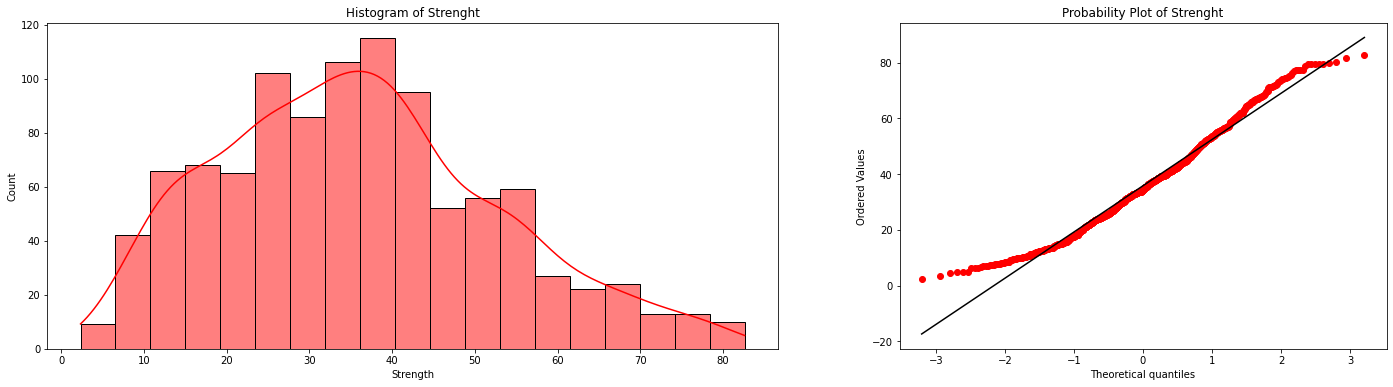

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 6), gridspec_kw={'width_ratios': [3, 2]})

sns.histplot(target, kde = True, color = 'red', stat = 'count', ax = ax1)
ax1.set_title('Histogram of Strenght')
stats.probplot(target, plot = sns.lineplot(ax = ax2))
ax2.set_title('Probability Plot of Strenght')
ax2.get_lines()[0].set_color('red')
ax2.get_lines()[1].set_color('black')

No outliers.

Normalize substracting the mean and dividing by the standard derivation 

In [11]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Save the number of predictors to make the input nodes in the first layer 

In [12]:
n_cols = predictors_norm.shape[1]

Import the libraries (there are two models in the keras library, one of them is the Sequential model and the other one is the model class used with the functional API)

In [13]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
print("setup complete")

setup complete


A Sequential model can be created just like any other model in python. 

Let's define a function that defines our regression model for us.

In [39]:
def regression_model():
    model = Sequential() # call the constructor
    # then use the add method to add each dense layer
    
    # for the firts layer we need to paas in the input_shape parameter the number or predictors
    # spcify the number of neurons in each layer and the activation function
    # 'ReLu' is one of the recommended function for hidden layers
        # 50 neurons per layer
    model.add(Dense(50, activation='relu', input_shape=(n_cols,))) 
    # reapeat for the hidden layers (without input_shape parameter)
    # model.add(Dense(30,activation='relu')) 
    model.add(Dense(50,activation='relu')) 
    model.add(Dense(1)) # create the output parameter with one neuron
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has two hidden layers, each of 50 hidden units. Let's create a model calling the function

In [40]:
model = regression_model()

We will train and test model at the same time using the fit method
Leave out the 30% of the data for validation.

In [41]:
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 3s - loss: 1688.6498 - val_loss: 1184.3892
Epoch 2/100
23/23 - 0s - loss: 1585.2573 - val_loss: 1089.6577
Epoch 3/100
23/23 - 0s - loss: 1428.5038 - val_loss: 938.6483
Epoch 4/100
23/23 - 0s - loss: 1176.4365 - val_loss: 730.0100
Epoch 5/100
23/23 - 0s - loss: 840.0169 - val_loss: 490.9486
Epoch 6/100
23/23 - 0s - loss: 495.5478 - val_loss: 302.1551
Epoch 7/100
23/23 - 0s - loss: 286.4374 - val_loss: 210.9483
Epoch 8/100
23/23 - 0s - loss: 219.1595 - val_loss: 184.9502
Epoch 9/100
23/23 - 0s - loss: 203.9124 - val_loss: 177.1698
Epoch 10/100
23/23 - 0s - loss: 195.3298 - val_loss: 170.7742
Epoch 11/100
23/23 - 0s - loss: 188.1966 - val_loss: 169.1989
Epoch 12/100
23/23 - 0s - loss: 182.7137 - val_loss: 162.5379
Epoch 13/100
23/23 - 0s - loss: 177.9124 - val_loss: 163.0826
Epoch 14/100
23/23 - 0s - loss: 173.4769 - val_loss: 162.3835
Epoch 15/100
23/23 - 0s - loss: 169.8593 - val_loss: 160.7004
Epoch 16/100
23/23 - 0s - loss: 167.3407 - val_loss: 161.2003
Epoch 17/10

now we can use 'predictions = model.predict(test_data)' for an unknow-target data

dict_keys(['loss', 'val_loss'])


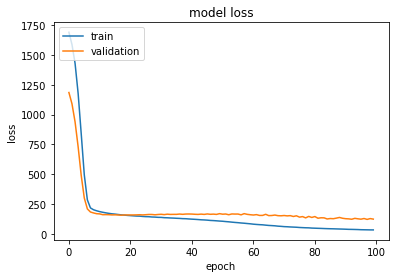

In [42]:
#I want to plot the output of this simple neural network:

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()